# Machine Learning Model for Spotify Songs/Tracks Data

## 1. Read CSV and Perform Data Cleaning

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
import joblib

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
# Read and consolidate all spotify data from all genres
pop_df = pd.read_csv("spotify_data_pop_v2.csv")
hiphop_df = pd.read_csv("spotify_data_hiphop_v2.csv")
jazz_df = pd.read_csv("spotify_data_jazz_v2.csv")
rock_df = pd.read_csv("spotify_data_rock_v2.csv")
kpop_df = pd.read_csv("spotify_data_kpop_v2.csv")
instrumental_df = pd.read_csv("spotify_data_instrumental_v2.csv")
asmr_df = pd.read_csv("spotify_data_asmr_v2.csv")

# Make all csv consistent with all same columns and lower case genre values
jazz_df['genre'] = 'jazz'
rock_df['genre'] = 'rock'
kpop_df['genre'] = 'kpop'
# hiphop_df = hiphop_df.replace(to_replace="HipHop", value="hiphop")

# We use concat() function to consolidate all csv files
all_genres_csv = [pop_df, hiphop_df, jazz_df, rock_df, kpop_df, instrumental_df, asmr_df]
spotify_df = pd.concat(all_genres_csv)

# Create a genre label-encode column, so genre will be numerical
label_encoder = LabelEncoder()
label_encoder.fit(spotify_df["genre"])
encoded_genre = label_encoder.transform(spotify_df["genre"])
spotify_df['genre_label'] = encoded_genre

print(spotify_df.shape)
spotify_df

(7000, 17)


,artist_name,track_name,popularity,track_id,track_uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre,genre_label
0,The Weeknd,Blinding Lights,100,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.514,0.7300,-5.934,0.0598,0.00146,0.000095,0.0897,0.33400,171.005,200040,pop,5
1,Dua Lipa,Don't Start Now,97,6WrI0LAC5M1Rw2MnX2ZvEg,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,0.794,0.7930,-4.521,0.0842,0.01250,0.000000,0.0952,0.67700,123.941,183290,pop,5
2,Doja Cat,Say So,97,3Dv1eDb0MEgF93GpLXlucZ,spotify:track:3Dv1eDb0MEgF93GpLXlucZ,0.787,0.6730,-4.577,0.1580,0.25600,0.000004,0.0904,0.78600,110.962,237893,pop,5
3,Arizona Zervas,ROXANNE,95,696DnlkuDOXcMAnKlTgXXK,spotify:track:696DnlkuDOXcMAnKlTgXXK,0.621,0.6010,-5.616,0.1480,0.05220,0.000000,0.4600,0.45700,116.735,163636,pop,5
4,BENEE,Supalonely,95,4nK5YrxbMGZstTLbvj6Gxw,spotify:track:4nK5YrxbMGZstTLbvj6Gxw,0.863,0.6310,-4.689,0.0534,0.30500,0.000030,0.1230,0.81700,128.977,223480,pop,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sleep Crickets,Crickets with moving Binaural Sounds,37,6J6YO4ImbnY7PX0oKgCXe9,spotify:track:6J6YO4ImbnY7PX0oKgCXe9,0.201,0.4620,-21.545,0.0483,0.43100,0.960000,0.0684,0.03900,70.691,165102,asmr,0
996,ASMR Zeitgeist,Paper Cup Tapping,42,38oZKmHWPcJr5WMkXfiXnW,spotify:track:38oZKmHWPcJr5WMkXfiXnW,0.404,0.0566,-40.654,0.0450,0.39800,0.945000,0.1070,0.27900,90.171,212080,asmr,0
997,ASMR Anonymous,Paper Ripping,42,1zz0xpPwbIM6SOl57r8Azl,spotify:track:1zz0xpPwbIM6SOl57r8Azl,0.489,0.3330,-45.392,0.0313,0.30600,0.764000,0.5770,0.00422,95.673,125589,asmr,0
998,Track Circuit,Brown Noise Train,37,0gF7MgxBQJIx042PGbrWFr,spotify:track:0gF7MgxBQJIx042PGbrWFr,0.151,0.1490,-46.655,0.0693,0.96100,0.970000,0.1000,0.03540,135.819,219880,asmr,0


In [3]:
genre_label_check = pd.pivot_table(spotify_df, values="genre_label", index="genre")
genre_label_check

,genre_label
genre,
asmr,0
hiphop,1
instrumental,2
jazz,3
kpop,4
pop,5
rock,6


In [4]:
# Export the consolidated DataFrame to csv
spotify_df.to_csv("spotify_data_v4.csv", encoding="utf-8", index=False)

In [4]:
# Extract the necessary columns we need for machine learning model
spotify_df_clean = spotify_df[[
    'genre', 'genre_label', 'danceability', 'energy', 'acousticness',  
    'instrumentalness', 'valence', 'speechiness', 'loudness','tempo'
]]
spotify_df_clean.head()

,genre,genre_label,danceability,energy,acousticness,instrumentalness,valence,speechiness,loudness,tempo
0,pop,5,0.514,0.730,0.00146,0.000095,0.334,0.0598,-5.934,171.005
1,pop,5,0.794,0.793,0.01250,0.000000,0.677,0.0842,-4.521,123.941
2,pop,5,0.787,0.673,0.25600,0.000004,0.786,0.1580,-4.577,110.962
3,pop,5,0.621,0.601,0.05220,0.000000,0.457,0.1480,-5.616,116.735
4,pop,5,0.863,0.631,0.30500,0.000030,0.817,0.0534,-4.689,128.977


## 2. Statistical Summary

In [5]:
spotify_df_clean.describe()

,genre_label,danceability,energy,acousticness,instrumentalness,valence,speechiness,loudness,tempo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3.000000,0.548091,0.451397,0.422445,0.239502,0.396223,0.095390,-13.600165,114.513891
std,2.000143,0.220264,0.307148,0.391323,0.388004,0.246090,0.099989,10.733728,31.167412
min,0.000000,0.073300,0.002680,0.000023,0.000000,0.001020,0.024700,-50.618000,49.689000
25%,1.000000,0.399000,0.119000,0.051525,0.000000,0.193000,0.037900,-22.059000,88.964000
50%,3.000000,0.570000,0.508000,0.257000,0.000051,0.389000,0.054500,-8.624000,113.039000
75%,5.000000,0.723000,0.708000,0.880000,0.637000,0.569000,0.102000,-5.371000,136.571000
max,6.000000,0.970000,0.998000,0.996000,0.997000,0.980000,0.648000,-1.339000,206.247000


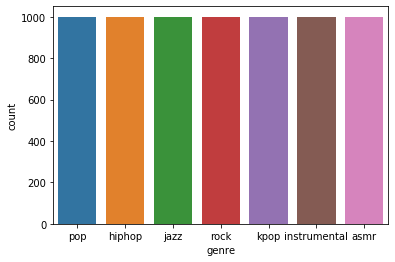

In [7]:
# Plot the data count of genres, it should be all the same numbers of songs for each genres
sns.countplot(spotify_df_clean["genre"], label =" Count")
plt.show()

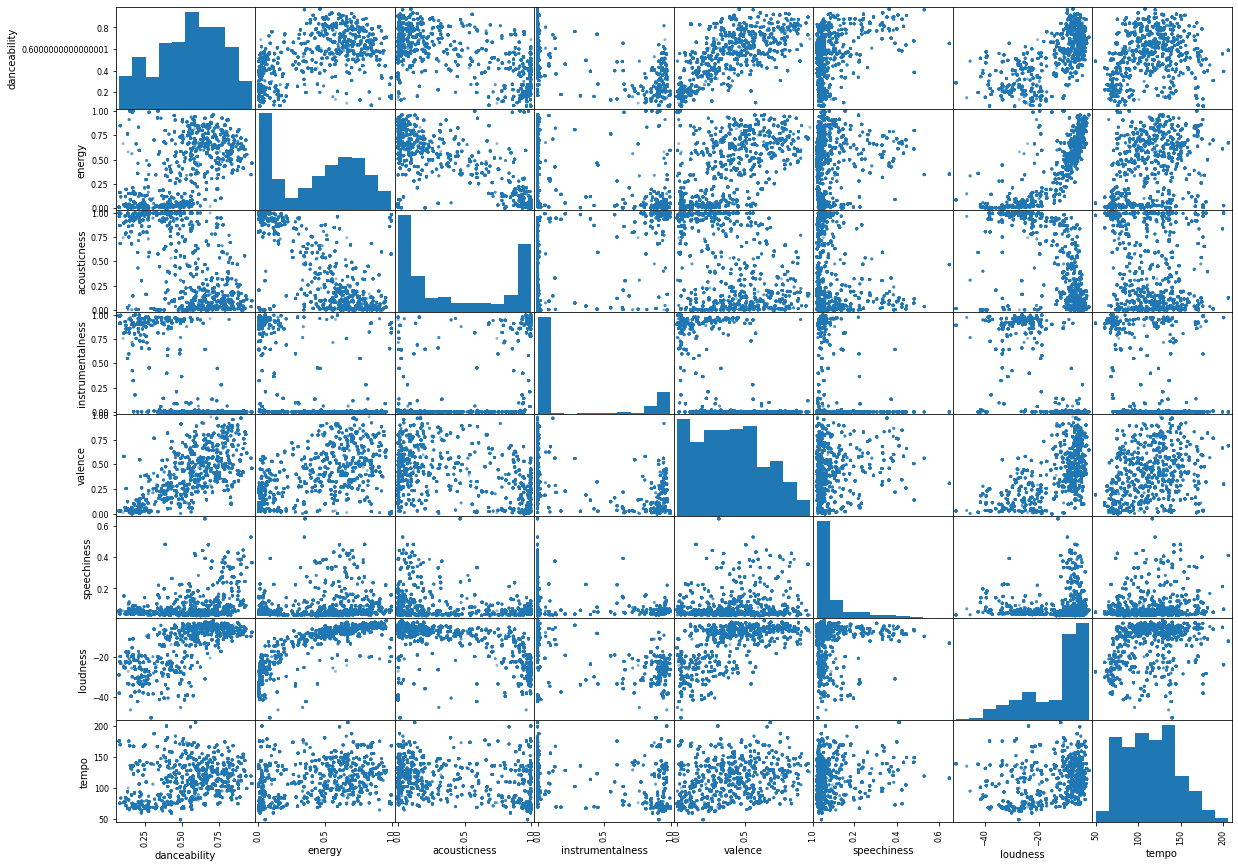

In [8]:
# Use pandas scatter_matrix to see the correlation of each features
scatter_matrix(spotify_df_clean.drop(["genre", "genre_label"], axis=1), figsize=(20,15))
plt.show()

## 3. Create Train Test Split and Scale Data

In [6]:
# Assign X (data) and y (target)
X = spotify_df_clean.drop(["genre", "genre_label"], axis=1)
y = spotify_df_clean["genre_label"]
print(X.shape, y.shape)
X

(7000, 8) (7000,)


,danceability,energy,acousticness,instrumentalness,valence,speechiness,loudness,tempo
0,0.514,0.7300,0.00146,0.000095,0.33400,0.0598,-5.934,171.005
1,0.794,0.7930,0.01250,0.000000,0.67700,0.0842,-4.521,123.941
2,0.787,0.6730,0.25600,0.000004,0.78600,0.1580,-4.577,110.962
3,0.621,0.6010,0.05220,0.000000,0.45700,0.1480,-5.616,116.735
4,0.863,0.6310,0.30500,0.000030,0.81700,0.0534,-4.689,128.977
...,...,...,...,...,...,...,...,...
995,0.201,0.4620,0.43100,0.960000,0.03900,0.0483,-21.545,70.691
996,0.404,0.0566,0.39800,0.945000,0.27900,0.0450,-40.654,90.171
997,0.489,0.3330,0.30600,0.764000,0.00422,0.0313,-45.392,95.673
998,0.151,0.1490,0.96100,0.970000,0.03540,0.0693,-46.655,135.819


In [7]:
y

0      5
1      5
2      5
3      5
4      5
      ..
995    0
996    0
997    0
998    0
999    0
Name: genre_label, Length: 7000, dtype: int64

In [10]:
# Create train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler model and fit it to the training data
X_scaler = MinMaxScaler().fit(X_train)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## 4. Training The Models

### Logistic Regression

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

print('Accuracy of logistic regression on training', logreg.score(X_train_scaled, y_train))
print('Accuracy of logistic regression on testing', logreg.score(X_test_scaled, y_test))

Accuracy of logistic regression on training 0.6391836734693878
Accuracy of logistic regression on testing 0.6404761904761904


### Decision Tree

In [13]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)

print('Accuracy of Decision tree on training', tree.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', tree.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.986938775510204
Accuracy of Decision tree on testing 0.98


In [14]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_2 = DecisionTreeClassifier(max_depth=8)
tree_2.fit(X_train_scaled, y_train)

print('Accuracy of Decision tree on training', tree_2.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', tree_2.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.903469387755102
Accuracy of Decision tree on testing 0.8961904761904762


### Random Forest

In [15]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)

print('Accuracy of Random Forest on training', rf.score(X_train_scaled, y_train))
print('Accuracy of Random Forest on testing', rf.score(X_test_scaled, y_test))

Accuracy of Random Forest on training 0.986938775510204
Accuracy of Random Forest on testing 0.98


In [16]:
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.1628429075519013, 'loudness'),
 (0.14714657560456645, 'energy'),
 (0.13768661677662053, 'speechiness'),
 (0.134741568771988, 'acousticness'),
 (0.13163571827635445, 'instrumentalness'),
 (0.12212684192899786, 'danceability'),
 (0.10274655713743447, 'valence'),
 (0.06107321395213688, 'tempo')]

### Features Definitions:

- Danceability - The higher the value, the easier it is to dance to this song. Danceability describes how suitable a track is for dancing based on a combination of muical elements including tempo, rhythm stability, beat strength, and overall regurality.
- Energy - the higher the value, the more energtic the song is. Energy represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- Acousticness - The higher the value the more acoustic the song is.
- Instrumentalness - The higher the value the greater likelihood the track contains no vocal content. Instrumentalness predicts whether a track contains no vocals.
- Valence - The higher the value, the more positive mood for the song. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Speechiness - The higher the value the more spoken word the song contains.
- Loudness (dB) - The higher the value, the louder the song. Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Values typical range between -60 and 0 dB.
- Tempo (BPM) - The tempo of the song (beats per minute).
- Popularity - The higher the value the more popular the song is.

### KNN

In [17]:
# K-nearest neighbor 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

print('Accuracy of KNN on training', knn.score(X_train_scaled, y_train))
print('Accuracy of KNN on testing', knn.score(X_test_scaled, y_test))

Accuracy of KNN on training 0.980204081632653
Accuracy of KNN on testing 0.9714285714285714


### Linear Discriminant Analysis

In [18]:
# Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

print('Accuracy of Linear Discriminant Analysis on training', lda.score(X_train_scaled, y_train))
print('Accuracy of Linear Discriminant Analysis on testing', lda.score(X_test_scaled, y_test))

Accuracy of Linear Discriminant Analysis on training 0.6553061224489796
Accuracy of Linear Discriminant Analysis on testing 0.6442857142857142


### Gaussian Naive Bayes 

In [19]:
# Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

print('Accuracy of GNB on training', gnb.score(X_train_scaled, y_train))
print('Accuracy of GNB on testing', gnb.score(X_test_scaled, y_test))

Accuracy of GNB on training 0.6179591836734694
Accuracy of GNB on testing 0.6338095238095238


### Support Vector Machine

In [20]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)

print('Accuracy of SVM on training', svm.score(X_train_scaled, y_train))
print('Accuracy of SVM on testing', svm.score(X_test_scaled, y_test))

Accuracy of SVM on training 0.6771428571428572
Accuracy of SVM on testing 0.6747619047619048


## 5. Save The Best Model 

In [21]:
# Save and export the best model with highest accuracy to pickle file
filename = 'spotify_ML_model_v2.pkl'
joblib.dump(rf, filename)

['spotify_ML_model_v2.pkl']

## 6. Load The Model

In [56]:
model = open('spotify_ML_model_v2.pkl','rb')
spotify_model = joblib.load(model)